In [2]:
## Importing relevant Libraries
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

## Understanding the Dataset

- The objective of the data collection is to organize the data regarding human movements and to get get it into machine readable format to apply Machine learning algorithms so as to classify our samples in line with mentioned target variables. This can also be used for open source projects

- The six selected ADL were standing, sitting, laying down, walking, walking downstairs and upstairs. A group of 30 volunteers
  with ages ranging from 19 to 48 years were selected for this task

- The training set of the data has 7352 instances (70% of dataset) and 561 feature vectors. Also provided are class labels and     the subject number. The test set has the same number of features except having 2947 samples.
- From each sampled window described above a vector of features was obtained. Standard measures such as the mean, correlation,
  signal magnitude area (SMA), energy, skewness and autoregression coefficients were employed for the feature mapping. A total     of 561 features were extracted to describe each activity window

- Support Vector Machine, which are generalized to the multiclass case through a One-Vs-All (OVA) approach is used here. The       SVM hyperparameters are selected through a 10-fold Cross Validation procedure and Gaussian kernels are used for experiments
- Maximum accuracy achieved was 96%

In [4]:
### Loading Preprocessed Dataset
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


#### The data has been preprocessed initially, has 561 feature vectors 1, column for subject number and another for label: Activity

### Building a Model oriented dataset

In [5]:
y_train=train.Activity
y_test=test.Activity
train.drop(['Activity','subject'],1,inplace=True)
test.drop(['Activity','subject'],1,inplace=True)

In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


# KNN


In [12]:
F1=[]
for k in range(1,51):    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train, y_train)
    scores = cross_val_score(neigh, train, y_train, cv=10,scoring='f1_weighted')
    F1.append(scores.mean())
F1

[0.8910396563053089,
 0.88337595250526046,
 0.90221298809279404,
 0.901872572673456,
 0.90646567013302959,
 0.90467760505673422,
 0.90713549042070962,
 0.90872708131438107,
 0.90627582899154668,
 0.90944245328981987,
 0.9083062480465095,
 0.90872251185903752,
 0.90635489239624933,
 0.90904204389045629,
 0.90786069996791985,
 0.90659164193251807,
 0.90603258535104358,
 0.90794399941533865,
 0.90700753605055406,
 0.90802554004385638,
 0.90561596202461581,
 0.90537879114987307,
 0.905202675803916,
 0.90441147565994573,
 0.90477432971767624,
 0.90401113919901976,
 0.90426446782696834,
 0.90344551211602886,
 0.90136904376974736,
 0.90235709448519508,
 0.90221388112608381,
 0.90303464806089961,
 0.90259065675922989,
 0.90232039018244792,
 0.90181756394087542,
 0.90180749848994757,
 0.90178726853534352,
 0.90261483796025832,
 0.90215755061668457,
 0.90196349664963404,
 0.90020343576440998,
 0.901803777087961,
 0.9001641388637488,
 0.90076958517088968,
 0.90045336914191942,
 0.9005346433378047

#### Plot b/w features and averaged f-1 score

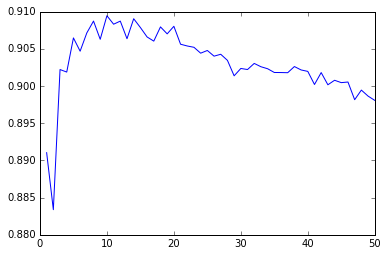

In [14]:
plt.plot(np.linspace(1,50,num=50),F1)

### Weighted F1 score maximum for k=10 (90.94%)

In [22]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(train, y_train)
y_pred=neigh.predict(test)
print(confusion_matrix(y_test,y_pred))
print('The accuracy score on test by KNN:{}'.format(accuracy_score(y_test,y_pred)))
print('The f1-score on test by KNN:{}'.format(f1_score(y_test,y_pred,average='weighted')))

[[534   2   1   0   0   0]
 [  0 409  78   0   0   4]
 [  0  47 485   0   0   0]
 [  0   0   0 486  10   0]
 [  0   0   0  51 331  38]
 [  0   0   0  36   8 427]]
The accuracy score on test by KNN:0.9066847641669494
The f1-score on test by KNN:0.9060128891364533


#### The metric statistics obtained for a 10- nearest neighbour classifier

# Elastic Net

##### The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

In [7]:
alpha=[1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2]
l1R=[0,0.15,0.5,0.7,1]
tuned_parameters = [{'alpha': alpha,
                     'l1_ratio':l1R}]
regr = SGDClassifier()
clf = GridSearchCV(regr, tuned_parameters, cv=10,scoring='f1_weighted')
clf.fit(train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

Best parameters set found on development set:

{'alpha': 0.0001, 'l1_ratio': 0.15}


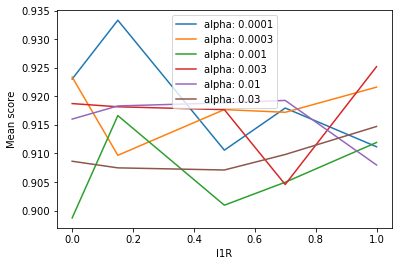

In [8]:
scores = [x[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(alpha), len(l1R))

for ind, i in enumerate(alpha):
    plt.plot(l1R, scores[ind], label='alpha: ' + str(i))
plt.legend()
plt.xlabel('l1R')
plt.ylabel('Mean score')
plt.show()

## Best params : Alpha= .0001 and l1_ratio= 0.15

In [9]:
clf = SGDClassifier(alpha= 0.0001, l1_ratio= 1)
clf.fit(train, y_train)
y_pred=clf.predict(test)
print(confusion_matrix(y_test,y_pred))
print('The accuracy score on test by ElasticnetSGD:{}'.format(accuracy_score(y_test,y_pred)))
print('The f1-score on test by ElasticNetSGD:{}'.format(f1_score(y_test,y_pred,average='weighted')))

[[537   0   0   0   0   0]
 [ 39 351  82  10   4   5]
 [  0   5 512  10   3   2]
 [  0   0   0 493   2   1]
 [  0   0   0   5 395  20]
 [  0   0   0  24   1 446]]
The accuracy score on test by ElasticnetSGD:0.9277231082456736
The f1-score on test by ElasticNetSGD:0.9252983135140076


#### The metric statistics obtained for a elastic net linear solver

# SVM

In [10]:
gamma=[1e-3, 1e-4]
C=[1, 10, 100, 1000]
tuned_parameters = [{'gamma': gamma,'C':C}]              
svm = SVC()
clf = GridSearchCV(svm, tuned_parameters, cv=10,scoring='f1_weighted')
clf.fit(train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001}


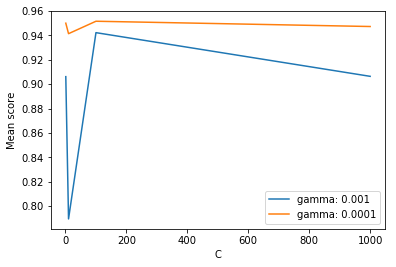

In [12]:
scores = [x[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(gamma), len(C))
for ind, i in enumerate(gamma):
    plt.plot(C, scores[ind], label='gamma: ' + str(i))
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean score')
plt.show()

### Best fit params Gamma = .001 and C=1000

In [17]:
clf = SVC(gamma=.001,C=1000)
clf.fit(train, y_train)
y_pred=clf.predict(test)
print(confusion_matrix(y_test,y_pred))
print('The accuracy score on test by SVC:{}'.format(accuracy_score(y_test,y_pred)))
print('The f1-score on test by SVC:{}'.format(f1_score(y_test,y_pred,average='weighted')))

[[537   0   0   0   0   0]
 [  0 436  53   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   4 406  10]
 [  0   0   0  17   0 454]]
The accuracy score on test by SVC:0.9657278588394977
The f1-score on test by SVC:0.9656245347276229


### Impressive performance by SVC. Over 96% accuuracy and f-1 score

## Random Forest

In [18]:
Depth=[300,500,600]
Trees=[200,500,700]
tuned_parameters = [{'n_estimators': Trees,'max_depth':Depth}]              
RFM = RandomForestClassifier()
clf = GridSearchCV(RFM, tuned_parameters, cv=10,scoring='f1_weighted')
clf.fit(train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

Best parameters set found on development set:

{'max_depth': 600, 'n_estimators': 500}


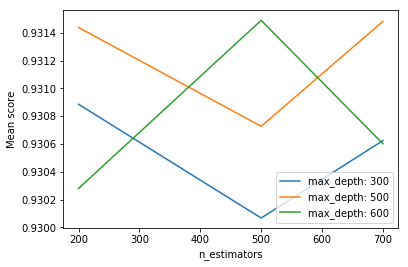

In [19]:
scores = [x[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(Depth), len(Trees))
for ind, i in enumerate(Depth):
    plt.plot(Trees, scores[ind], label='max_depth: ' + str(i))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Mean score')
plt.show()

In [21]:
clf = RandomForestClassifier(n_estimators= clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'])
clf.fit(train, y_train)
y_pred=clf.predict(test)
print(confusion_matrix(y_test,y_pred))
print()
print()
print('The accuracy score on test by Random Forest:{}'.format(accuracy_score(y_test,y_pred)))
print()
print('The f1-score on test by Random Forest:{}'.format(f1_score(y_test,y_pred,average='weighted')))

[[537   0   0   0   0   0]
 [  0 441  50   0   0   0]
 [  0  43 489   0   0   0]
 [  0   0   0 481  10   5]
 [  0   0   0  20 354  46]
 [  0   0   0  32   7 432]]


The accuracy score on test by Random Forest:0.9277231082456736

The f1-score on test by Random Forest:0.927441426614101


## End Notes

- In the studies conducted SVM achieved the highest accuracy of 96.57% and f-1 score of 96.56
- Contrastingly KNN performed the worst with an accuracy of 90.66% and f-1 score of 90.6
- Random Forests generally needs larger number of instances to work its randomization concept well and generalize to the novel     data. In addition, in one way or another, random forests works with combination of some kind of soft linear boundaries at the   decision surface thus I believe that this is still below the success of max margin SVM non linear boundaries.Thus if we have     small amount of data compared to possible variations of the instances than SVM is better choice. That is the case for           Computer Vision generally.